In [63]:
import pandas as pd

# Load the dataset
file_path = "exacterror/combined_matching_log_revised_exacterrormatch.csv"
df = pd.read_csv(file_path)

# Filter rows where 'All_ASR_Errors' is not empty
df_filtered = df[df['All_ASR_Errors'].notna() & df['All_ASR_Errors'].ne('')]

# Calculate the percentage of rows where 'result' == 1 for each 'Model_Size'
percentage_df = (
    df_filtered.groupby('Model_Size')['result']
    .apply(lambda x: (x == 1).mean() * 100)
    .reset_index()
    .rename(columns={'result': 'Percentage_Result_1'})
)

# Compare 'Therapist_Error_Description' and 'All_ASR_Errors'
df_filtered['Match'] = df_filtered.apply(
    lambda row: 'Match' if row['result'] == 1 else 'No Match', axis=1
)
match_counts = df_filtered['Match'].value_counts()

# Analyze text in 'Therapist_Error_Description' and 'All_ASR_Errors' for matches
matched_rows = df_filtered[df_filtered['Match'] == 'Match']
error_analysis = matched_rows.groupby('Model_Size')[['Therapist_Error_Description', 'All_ASR_Errors']].apply(lambda x: x.to_dict(orient='records'))

# Print or save the result
print(percentage_df)
print("\nComparison of Therapist_Error_Description and All_ASR_Errors:")
print(match_counts)
print("\nError Analysis by Model Size:")
print(error_analysis)
# percentage_df.to_csv("processed_results.csv", index=False)  # Uncomment to save the output


  Model_Size  Percentage_Result_1
0       base            70.895522
1      large            69.811321
2     medium            66.666667
3      small            71.028037
4       tiny            66.165414
5      turbo            76.106195

Comparison of Therapist_Error_Description and All_ASR_Errors:
Match
Match       493
No Match    211
Name: count, dtype: int64

Error Analysis by Model Size:
Model_Size
base      [{'Therapist_Error_Description': 'fast speech ...
large     [{'Therapist_Error_Description': 'phonemic add...
medium    [{'Therapist_Error_Description': 'phonemic del...
small     [{'Therapist_Error_Description': 'additional w...
tiny      [{'Therapist_Error_Description': 'word additio...
turbo     [{'Therapist_Error_Description': 'fast speech ...
dtype: object


/var/folders/1v/pdhn508d5pd5nrwqh0kmf1z40000gn/T/ipykernel_98038/2451785010.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Match'] = df_filtered.apply(


In [46]:
import numpy as np

# Given match percentages for different model sizes
match_percentages = np.array([70.895522, 69.811321, 66.666667, 71.028037, 66.165414, 76.106195])

# Calculate mean and standard deviation
mean_value = np.mean(match_percentages)
std_value = np.std(match_percentages, ddof=1)  # Using ddof=1 for sample standard deviation

(mean_value, std_value)


(70.11219266666667, 3.6033226994672933)

/var/folders/1v/pdhn508d5pd5nrwqh0kmf1z40000gn/T/ipykernel_37467/1165625711.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Filtered_Error_Description'] = df_filtered['Therapist_Error_Description'].apply(extract_error)


Error Transition Counts:
ancient→accident: 11
clings→cleaning: 5
likes→like: 6
look→took: 6
coat→clothes: 2
swiftly→swift: 6
utmost→uppermost: 6
quivers→shiver: 6
winter→weather: 6
ooze→zone: 6
have→had: 5
these→this: 6
pot→point: 5
one→each: 5
finds→find: 3
looks→look: 6
coat→cloak: 3
observe→deserve: 5
utmost→utter: 4
trifle→bit: 6
walk→break: 6
answers→answered: 1
raindrops→rainbow: 6
find→found: 5
clings→links: 3
each→a: 4
looking→look: 2
my→your: 6
he→this: 6
ooze→colds: 6
or→on: 5
is→in: 6
ever→even: 6
swiftly→swiftty: 6
voice→voy: 4
cracked→clacked: 5
zest→zip: 6
apparently→apparent: 5
dresses→dress: 10
clings→clangs: 1
giving→give: 5
the→there: 6
trifle→twiff: 6
prevents→present: 6
answers→answer: 4
ends→end: 2
apparently→apparence: 2
ooze→oost: 6
prism→pris: 6
frock→flock: 10
usually→ulily: 1
flowing→floor: 6
clings→king: 2
quivers→quail: 5
prevent→pevent: 4
arch→up: 3
swiftly→swifty: 3
quivers→quivis: 3
answers→sayanswer: 4
at→ant: 6
beard→board: 4
a→an: 5
zest→zesium: 5
at→a

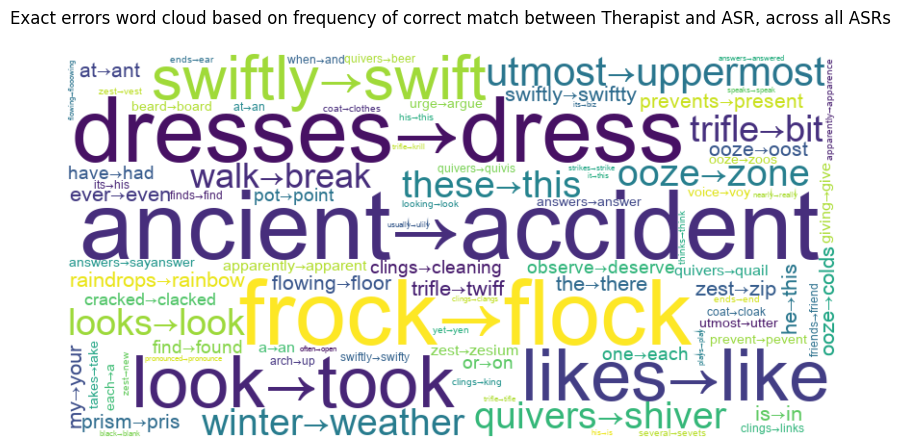

In [2]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter

# Load the dataset
file_path = "exacterror/combined_matching_log_revised_exacterrormatch.csv"
df = pd.read_csv(file_path)

# Filter matched cases and descriptions containing '->'
df_filtered = df[(df['result'] == 1) & (df['Therapist_Error_Description'].str.contains("->", na=False))]

# Extract only the relevant part (word before and after '->')
def extract_error(text):
    match = re.search(r"(\b\S+\b)\s*->\s*(\b\S+\b)", text)
    return f"{match.group(1)}→{match.group(2)}" if match else ""

df_filtered['Filtered_Error_Description'] = df_filtered['Therapist_Error_Description'].apply(extract_error)

# Count occurrences of each x➡y phrase
error_counts = Counter(df_filtered['Filtered_Error_Description'].dropna().astype(str))

# Print counts
print("Error Transition Counts:")
for error, count in error_counts.items():
    print(f"{error}: {count}")

# import matplotlib.font_manager as fm
# for font in fm.findSystemFonts(fontpaths=None, fontext='ttf'):
#     print(font)
# Generate word cloud using frequency dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', collocations=False,font_path='/Library/Fonts/Arial Unicode.ttf').generate_from_frequencies(error_counts)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Exact errors word cloud based on frequency of correct match between Therapist and ASR, across all ASRs\n")
plt.show()

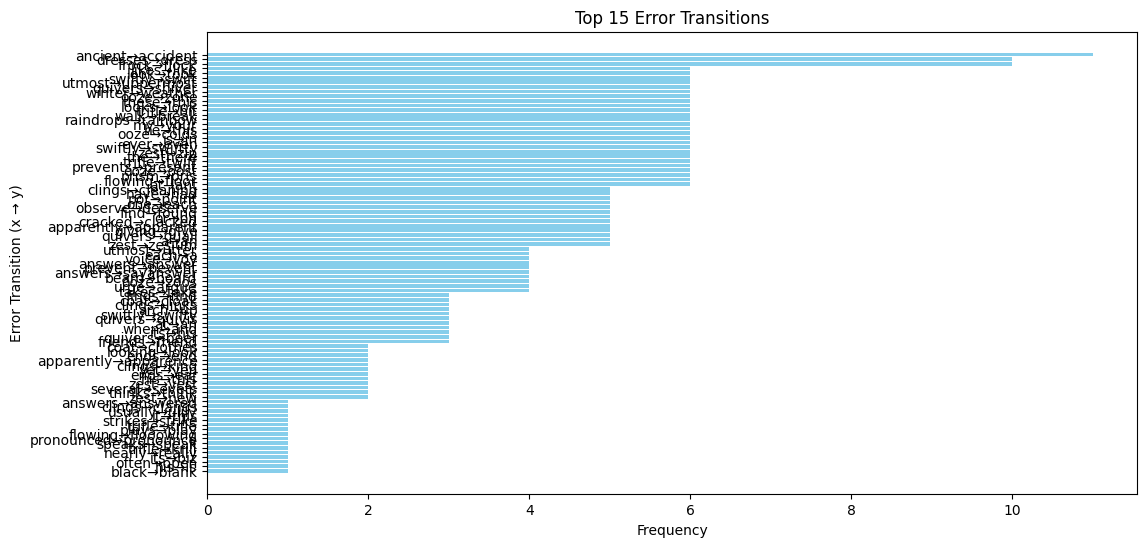

In [41]:
import matplotlib.pyplot as plt

# Sort errors by frequency
sorted_errors = sorted(error_counts.items(), key=lambda x: x[1], reverse=True)

# Extract labels and counts
labels, counts = zip(*sorted_errors[:100])  # Show top 15 transitions

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.barh(labels, counts, color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Error Transition (x → y)")
plt.title("Top 15 Error Transitions")
plt.gca().invert_yaxis()  # Flip so highest is on top
plt.show()


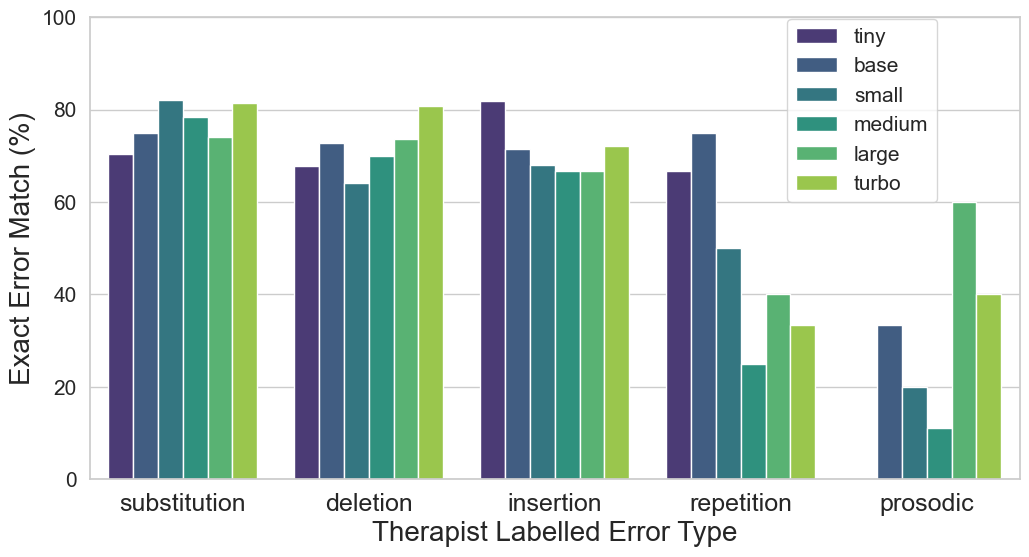

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "exacterror/combined_matching_log_revised_exacterrormatch.csv"
df = pd.read_csv(file_path)

# Filter rows where 'All_ASR_Errors' is not empty
df_filtered = df[df['All_ASR_Errors'].notna() & df['All_ASR_Errors'].ne('')]

# Filter rows where Therapist_Error_Group is not empty
df_filtered = df_filtered.dropna(subset=['Therapist_Error_Group_old'])

# Define the desired order for Therapist_Error_Group and Model_Size
error_group_order = ["substitution", "deletion", "insertion", "repetition", "prosodic"]
model_size_order = ["tiny", "base", "small", "medium", "large", "turbo"]

# Group by Therapist_Error_Group and Model_Size, calculate match percentage
match_percentages = (
    df_filtered.groupby(['Therapist_Error_Group_old', 'Model_Size'])['result']
    .agg(lambda x: (x.sum() / len(x)) * 100)  # Percentage of matches
    .reset_index()
)

# Convert columns to categorical types with the defined order
match_percentages['Therapist_Error_Group_old'] = pd.Categorical(
    match_percentages['Therapist_Error_Group_old'], categories=error_group_order, ordered=True
)
match_percentages['Model_Size'] = pd.Categorical(
    match_percentages['Model_Size'], categories=model_size_order, ordered=True
)

# Sort data by the specified order
match_percentages = match_percentages.sort_values(['Therapist_Error_Group_old', 'Model_Size'])

# Set plot style
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Create bar plot
ax = sns.barplot(
    x="Therapist_Error_Group_old",
    y="result",
    hue="Model_Size",
    data=match_percentages,
    palette="viridis"
)

# Labels and title
plt.xlabel("Therapist Labelled Error Type",fontsize=20)
plt.ylabel("Exact Error Match (%)",fontsize=20)
# plt.title("Percentage of Matches per Therapist Error Group Across Model Sizes")
plt.xticks(rotation=0, ha="center",fontsize=18)
plt.yticks(fontsize=15)
plt.legend(fontsize=15,loc=[0.75,0.6])#title="Model Size")
plt.ylim(0,100)


# Show plot
plt.show()
